# Multicollinearity of Features - Lab

## Introduction

In this lab you'll identify multicollinearity in the Boston Housing dataset.

## Objectives
You will be able to:
* Plot heatmaps for the predictors of the Boston dataset
* Calculate correlation matrices

## Correlation matrix for the Boston Housing data

Let's reimport the Boston Housing data and use the data with the categorical variables for `tax_dummy` and `rad_dummy`: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX", drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD", drop_first=True)
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

# Inspect the data
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


## Scatter matrix

Create the scatter matrix for the Boston Housing data: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a30ce7400>,
      dtype=object)

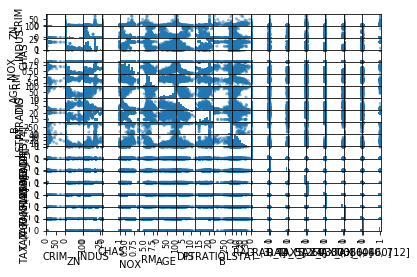

In [2]:
pd.plotting.scatter_matrix(boston_features,figsize = );

This took a while to load. Not surprisingly, the categorical variables didn't really provide any meaningful result. Remove the categorical columns associated with `'RAD'` and `'TAX'` from the data again and look at the scatter matrix again: 

## Correlation matrix

Next, let's look at the correlation matrix: 

Return `True` for positive or negative correlations that are bigger than 0.75: 

Remove the most problematic feature from the data: 

## Summary
Good job! You've now edited the Boston Housing data so highly correlated variables are removed. 